In [1]:
import sys
import subprocess

# Pastikan library utama sudah terpasang
for pkg in ["sklearn", "wordcloud", "matplotlib", "pandas"]:
    try:
        __import__(pkg)
    except ModuleNotFoundError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# Import library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("✅ Semua library sudah siap digunakan!")

✅ Semua library sudah siap digunakan!


In [2]:
documents = [
    "Artificial intelligence is transforming the world.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a part of machine learning that uses neural networks.",
    "Natural language processing helps computers understand human language.",
    "Computer vision enables machines to interpret and process visual information."
]

df = pd.DataFrame(documents, columns=["Document"])
print("\n📄 Data dokumen:\n")
display(df)


📄 Data dokumen:



,Document
0,Artificial intelligence is transforming the wo...
1,Machine learning is a subset of artificial int...
2,Deep learning is a part of machine learning th...
3,Natural language processing helps computers un...
4,Computer vision enables machines to interpret ...


In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["Document"])

print("✅ TF-IDF Matrix terbentuk!\n")
print("🔤 Daftar fitur (kata unik):")
print(vectorizer.get_feature_names_out())

✅ TF-IDF Matrix terbentuk!

🔤 Daftar fitur (kata unik):
['artificial' 'computer' 'computers' 'deep' 'enables' 'helps' 'human'
 'information' 'intelligence' 'interpret' 'language' 'learning' 'machine'
 'machines' 'natural' 'networks' 'neural' 'process' 'processing' 'subset'
 'transforming' 'understand' 'uses' 'vision' 'visual' 'world']


In [4]:
similarity_matrix = cosine_similarity(tfidf_matrix)
print("\n📈 Matriks Cosine Similarity antar dokumen:\n")
print(pd.DataFrame(similarity_matrix, columns=[f"Doc {i+1}" for i in range(len(df))],
                   index=[f"Doc {i+1}" for i in range(len(df))]))


📈 Matriks Cosine Similarity antar dokumen:

          Doc 1     Doc 2     Doc 3  Doc 4  Doc 5
Doc 1  1.000000  0.377403  0.000000    0.0    0.0
Doc 2  0.377403  1.000000  0.381916    0.0    0.0
Doc 3  0.000000  0.381916  1.000000    0.0    0.0
Doc 4  0.000000  0.000000  0.000000    1.0    0.0
Doc 5  0.000000  0.000000  0.000000    0.0    1.0


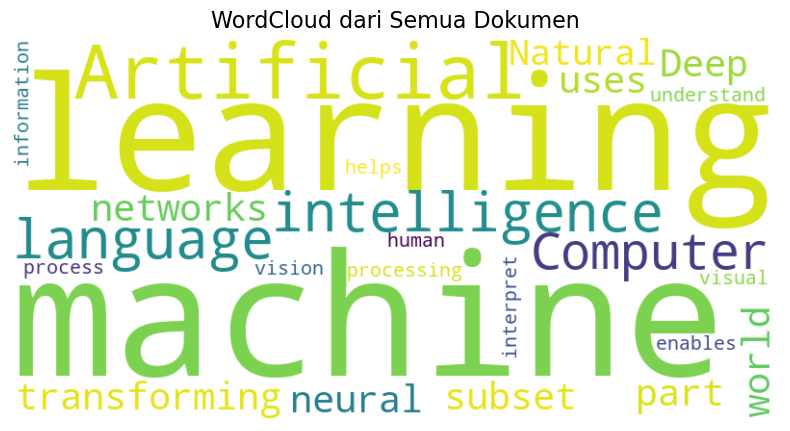

In [5]:
text_all = " ".join(df["Document"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Semua Dokumen", fontsize=16)
plt.show()

In [6]:
doc_a = 0  # misalnya Dokumen 1
doc_b = 1  # dan Dokumen 2

similarity_score = similarity_matrix[doc_a, doc_b]
print(f"\n🔍 Similarity antara Doc {doc_a+1} dan Doc {doc_b+1}: {similarity_score:.4f}")


🔍 Similarity antara Doc 1 dan Doc 2: 0.3774
